In [1]:
%pylab inline
#sys.path.insert(0, '/home/peter/code/projects/tradesys/')
from tradesys import *
from tradesys.testing import *
import talib as ta
from sklearn.preprocessing import scale

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
datamatrix = DataMatrix()
datamatrix.load_multicharts('../../deep_learning_trader/data/EURUSD_1_Minute_01_01_2010-10_31_2016.txt')
datamatrix.clip_dt(DateTime(2015,1,1), DateTime(2015,7,1))

In [3]:
#dmat2df(datamatrix).head()

In [4]:
len(datamatrix)

61312

In [5]:
#datamatrix = fill_incomplete_datamatrix(datamatrix)

In [6]:
#dmat2df(datamatrix).head()

In [7]:
len(datamatrix)

61312

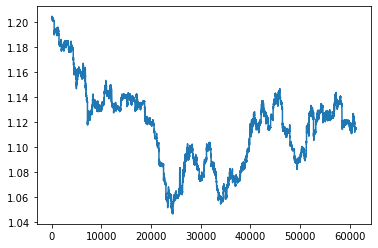

In [8]:
plot(datamatrix.close);

In [9]:
datalen = len(datamatrix)

d_open = np.array(datamatrix.open)
d_high = np.array(datamatrix.high)
d_low = np.array(datamatrix.low)
d_close = np.array(datamatrix.close)
d_volume = np.array(datamatrix.volume)
d_year = np.array([x.year for x in datamatrix.get_dt_list()])
d_month = np.array([x.month for x in datamatrix.get_dt_list()])
d_day = np.array([x.day for x in datamatrix.get_dt_list()])
d_hour = np.array([x.hour for x in datamatrix.get_dt_list()])
d_minute = np.array([x.minute for x in datamatrix.get_dt_list()])
d_second = np.array([x.second for x in datamatrix.get_dt_list()])

In [10]:
import datamodel_super as dm
dmodel = dm.DataModel()
dmodel.input(np.vstack([d_open, d_high, d_low, d_close, d_volume, 
                        d_year, d_month, d_day, d_hour, d_minute, d_second]))

In [11]:
dmodel.process()
nc = dmodel.cut_nans()
nc

178

In [12]:
dmodel.data.shape

(174, 61134)

In [13]:
dmodel.data[0:10, 0:5]

array([[ 0.0282413 ,  0.2255302 ,  0.74341354, -0.19370871, -0.14438648],
       [-0.02205513,  0.75186457,  0.00374219, -0.02205513, -0.25423104],
       [ 0.08260172,  0.21392008,  0.45029314,  0.03007437, -0.02245297],
       [ 0.22451962,  0.74009711, -0.19285263, -0.14375001, -0.14375001],
       [-0.05815477,  0.08764955,  0.45702048,  0.36953789,  0.42785961],
       [ 0.03889292,  0.3487399 ,  0.32937447,  0.38747077,  0.38747077],
       [-0.04869799,  0.20540447,  0.29336301,  0.39109473,  0.58655816],
       [ 0.08758175,  0.45667299,  0.36925664,  0.4275342 ,  0.36925664],
       [-0.20265079,  0.49936011,  0.26608501,  0.17145065,  0.09063495],
       [-0.10315473,  0.23392262,  0.20925842,  0.20925842,  0.22570122]])

In [14]:
tgt = np.vstack([d_open[nc:], 
                 d_high[nc:], 
                 d_low[nc:], 
                 d_close[nc:]])
tgt.shape

(4, 61134)

In [15]:
tgt[:, 0:5]

array([[1.20279, 1.20288, 1.20318, 1.2031 , 1.20304],
       [1.20291, 1.2032 , 1.2032 , 1.20319, 1.20309],
       [1.20272, 1.2028 , 1.20297, 1.20298, 1.20297],
       [1.20288, 1.20318, 1.2031 , 1.20304, 1.20298]])

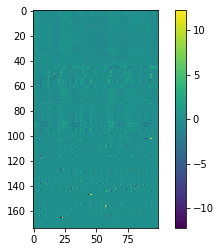

In [16]:
imshow(dmodel.data[:, 0:100]); colorbar();

In [17]:
np.save(open("data_eurusd.npy",'wb'), dmodel.data)
np.save(open("data_eurusd_targets.npy",'wb'), tgt)

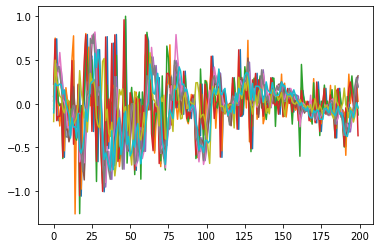

In [18]:
plot(dmodel.data.T[0:200, 0:10]);